In [1]:
import numpy as np
import pylab as pl
from scipy import optimize
from numdifftools import Gradient, Derivative

[(4.239767651589691e-09+1.0023587343686245e-97j), (-4.239768830552634e-09-1.0013419504544152e-97j), (2.0499437627276765e-06+0j)]
      converged: True
           flag: 'converged'
 function_calls: 54
     iterations: 18
           root: (-7.772440292535378e-10+0j)


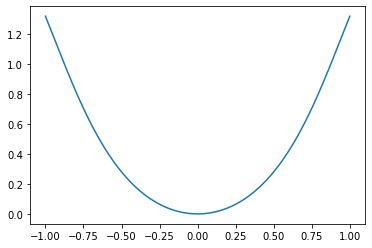

In [31]:
def f(x):
    return np.exp(np.sin(x**2)) - 1

df = Derivative(f)
ddf = Derivative(df)

x0 = 1. + 0*1j
x00 = x0
x000 = x0
x0000 = x0
for i in range(19):
    delta = np.sqrt(df(x0)**2 - 2*f(x0)*ddf(x0))
    x1 = x0 + (-df(x0) + delta) / ddf(x0)
    x2 = x0 + (-df(x0) - delta) / ddf(x0)
    #x0 = np.min(np.abs([x1-x0, x2-x0]))
    x0 = x1
    x00 = x2
    x000 = x000 - f(x000)/df(x000)
print([x0, x00, x000])

print(optimize.root_scalar(f, fprime=df, fprime2=ddf, x0 = x0000))
t = np.linspace(-1, 1, 1000)
pl.plot(t, f(t))

In [2]:
from scipy.special import factorial, binom
from scipy import stats
%matplotlib qt

In [4]:
N = 10.
k = np.arange(0, N+1, 1)

res = binom(N, k) * factorial(k) * N**(-k) * (k/N)**(N-k)
print(res)
res = res/np.sum(res)

mu = np.sum(k * res)
std = np.sqrt(np.sum((k-mu)**2 * res))
print(mu, std)

pl.plot(k, stats.norm.pdf(k, mu, std))
pl.plot(k, res)

[0.000e+00 1.000e-09 2.560e-06 2.187e-04 4.096e-03 3.125e-02 1.296e-01
 3.430e-01 6.400e-01 9.000e-01 1.000e+00]
8.7173350232371 1.2211234510398998


In [21]:
def p(N, k):
    return (N-k)/N


N = 500.
k = 316.
j = np.arange(0, k+1)
np.sum(N / (N-j))

500.3372344389515

In [48]:
from scipy.stats import norm, t

mu, std = np.mean(a), np.std(a, ddof=1)/np.sqrt(a.size)
rv = norm(mu, std)
print(rv.ppf(0.01/2), t.ppf(0.01/2, a.size-1, mu, std))

x = np.linspace(0, 100, 1000)
%matplotlib qt
pl.plot(x, rv.pdf(x))
pl.plot(x, t.pdf(x, a.size-1, mu, std))

44.56360801955594 44.045114079440495


0.006068


(array([6.40000e+01, 1.84000e+03, 2.53580e+04, 1.41120e+05, 3.30005e+05,
        3.30147e+05, 1.43485e+05, 2.59810e+04, 1.93600e+03, 6.40000e+01]),
 array([36.1   , 39.8125, 43.525 , 47.2375, 50.95  , 54.6625, 58.375 ,
        62.0875, 65.8   , 69.5125, 73.225 ]),
 <a list of 10 Patch objects>)

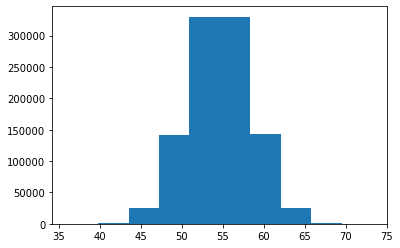

In [41]:
a = np.array([64, 95, 28, 64, 62, 54, 92, 96, 86, 69, 102, 75, 33, 33,
              68, 86, 45, 37, 59, 20, 33, 18, 7, 18, 38, 66, 45, 66, 80,
              69, 58, 44, 41, 70, 25, 51, 71, 68, 13, 38])
n = 1000000
b = np.mean(np.random.choice(a, (a.size, n)), 0)

print(np.sum(b<45)/n)
pl.hist(b)

In [52]:
def mix_array(a, b):
    return a.reshape(a.size, 1) @ b.reshape(1, b.size)

def eval2d(f, g, x1, x2):
    a = f(x1)
    b = g(x2)
    return a.reshape(a.size, 1) @ b.reshape(1, b.size)

def basis(points, N):
    n = points.size
    x = np.lispace(np.min(x), np.max(x), N)
    for i in range(n):
        for j in range(n):
            if (i==j): continue
            base[i, j] *= (x*x[i])/(x[i]-x[j])
    return base

def nd_basis(basis, x1, x2):
    x1_basis = basis(x1)
    x2_basis = basis(x2)
    n1 = x1_basis.shape[0]
    n2 = x2_basis.shape[0]

    return x1_basis.reshape(n1, 1, n1, 1) @ x2_basis.reshape(1, n2, 1, n2)



a = nd_basis(basis, np.array([0.1,0.5,1]), np.array([0.1,0.5,1]))
print(a)

[[[[0.00996671 0.04786269 0.08400692]
   [0.04786269 0.22984885 0.40342268]
   [0.08400692 0.40342268 0.70807342]]

  [[0.01983384 0.08400692 0.09077827]
   [0.09524715 0.40342268 0.43594041]
   [0.16717448 0.70807342 0.7651474 ]]

  [[0.02950279 0.09958333 0.01408849]
   [0.14167993 0.47822457 0.06765654]
   [0.24867168 0.83936309 0.11874839]]]


 [[[0.01983384 0.09524715 0.16717448]
   [0.08400692 0.40342268 0.70807342]
   [0.09077827 0.43594041 0.7651474 ]]

  [[0.0394695  0.16717448 0.18064951]
   [0.16717448 0.70807342 0.7651474 ]
   [0.18064951 0.7651474  0.82682181]]

  [[0.0587108  0.19817166 0.02803622]
   [0.24867168 0.83936309 0.11874839]
   [0.26871576 0.90701962 0.12832006]]]


 [[[0.02950279 0.14167993 0.24867168]
   [0.09958333 0.47822457 0.83936309]
   [0.01408849 0.06765654 0.11874839]]

  [[0.0587108  0.24867168 0.26871576]
   [0.19817166 0.83936309 0.90701962]
   [0.02803622 0.11874839 0.12832006]]

  [[0.08733219 0.29477992 0.04170381]
   [0.29477992 0.99499625 0.14

In [53]:
def nd_basis(basis, x1, x2):
    x1_basis = basis(x1)
    x2_basis = basis(x2)
    n1 = x1_basis.shape[0]
    n2 = x2_basis.shape[0]
    
    n_basis = np.empty((n1, n2, n1, n2))
    for i in range(n1):
        for j in range(n2):
            n_basis[i, j] = mix_array(x1_basis[i], x2_basis[j])
            
    a.reshape(a.size, 1) @ b.reshape(1, b.size)
    return x1_basis.reshape(n1, 1, n1, 1) @ x2_basis.reshape(1, n2, 1, n2)

b = nd_basis(basis, np.array([0.1,0.5,1]), np.array([0.1,0.5,1]))
print(b-a)

[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]


 [[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]


 [[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]]
